In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.initializers import VarianceScaling
from keras.regularizers import l2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

Using TensorFlow backend.


In [ ]:
dataset = pd.read_csv('./ch.csv')
X = dataset.iloc[:, 3:-1]
y = dataset.iloc[:, -1]

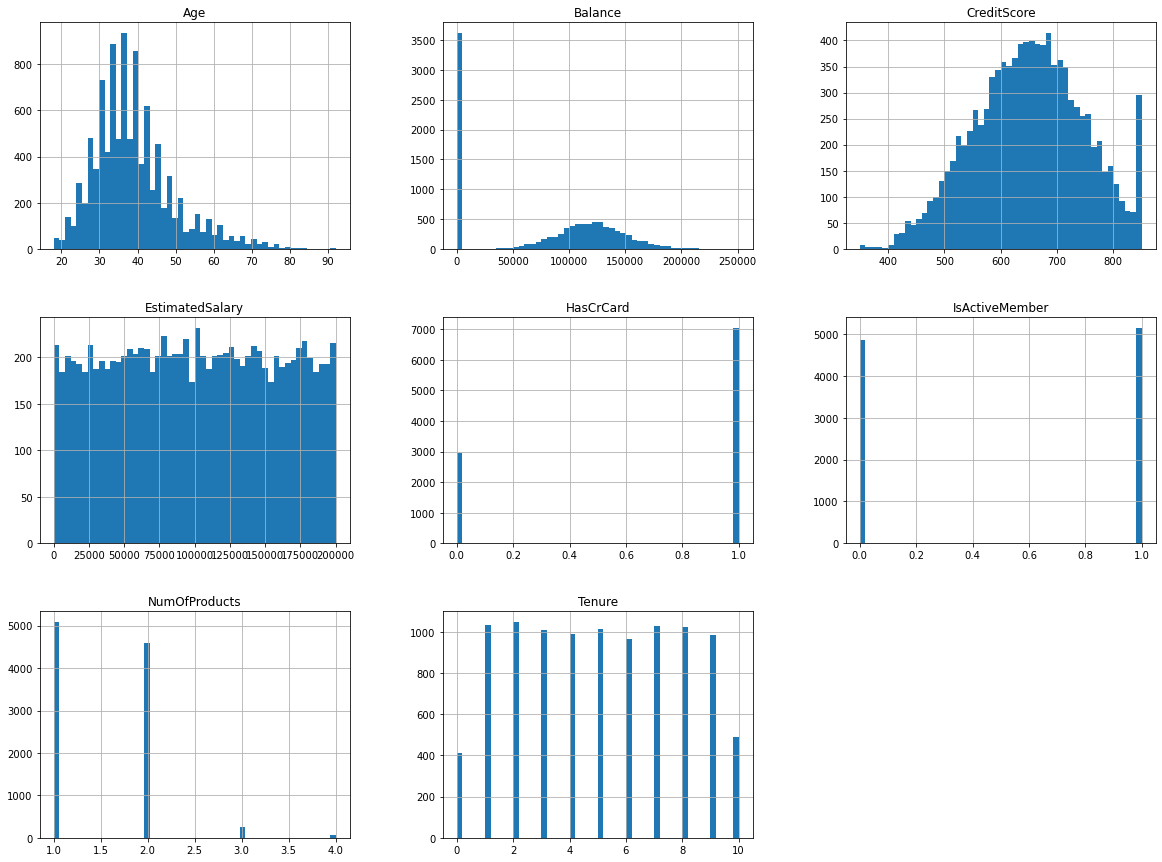

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
[1 0 1 ... 1 1 0]


In [ ]:
import matplotlib.pyplot as plt
X.hist(bins=50, figsize=(20,15))
plt.show()

X = X.values
y = y.values
print(X)
print(y)

In [ ]:
# label encoding for the gender cat
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [ ]:
# one hot encoding for cat enc and col transfer to combine
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
# feature scalling
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
# splitting using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# creating the neural network
def create_network(optimizer='RMSprop'):
        model = Sequential()
        model.add(Dense(units=36, input_shape=(X_train.shape[1],),
                        kernel_regularizer=l2(0.001),           # weight regularizer
                        kernel_initializer=VarianceScaling(),   # initializer
                        activation='relu'))
        model.add(Dense(units=28,
                        kernel_regularizer=l2(0.01),            # weight regularizer
                        kernel_initializer=VarianceScaling(),   # initializer
                        activation='relu'))
        model.add(Dense(units=1, activation='sigmoid'))

        # Compile the Model
        model.compile(loss='binary_crossentropy', optimizer = optimizer,
                      metrics=['acc','mae'])

        return model

In [ ]:
# building the network
neural_network = KerasClassifier(build_fn=create_network, verbose=1)

In [ ]:
# fitting on train data
neural_network.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 716us/step - loss: 0.7570 - acc: 0.7670 - mae: 0.3593
Epoch 2/100
250/250 [==============================] - 0s 711us/step - loss: 0.5209 - acc: 0.8160 - mae: 0.2747
Epoch 3/100
250/250 [==============================] - 0s 757us/step - loss: 0.4604 - acc: 0.8365 - mae: 0.2576
Epoch 4/100
250/250 [==============================] - 0s 705us/step - loss: 0.4378 - acc: 0.8399 - mae: 0.2515
Epoch 5/100
250/250 [==============================] - 0s 691us/step - loss: 0.4190 - acc: 0.8464 - mae: 0.2396
Epoch 6/100
250/250 [==============================] - 0s 701us/step - loss: 0.4079 - acc: 0.8495 - mae: 0.2329
Epoch 7/100
250/250 [==============================] - 0s 717us/step - loss: 0.3830 - acc: 0.8644 - mae: 0.2204
Epoch 8/100
250/250 [==============================] - 0s 761us/step - loss: 0.3987 - acc: 0.8505 - mae: 0.2301
Epoch 9/100
250/250 [==============================] - 0s 681us/step - loss: 0.3878 - acc: 0.8611 - mae:

250/250 [==============================] - 0s 693us/step - loss: 0.3349 - acc: 0.8684 - mae: 0.1961
Epoch 74/100
250/250 [==============================] - 0s 677us/step - loss: 0.3529 - acc: 0.8561 - mae: 0.2078
Epoch 75/100
250/250 [==============================] - 0s 666us/step - loss: 0.3451 - acc: 0.8613 - mae: 0.2027
Epoch 76/100
250/250 [==============================] - 0s 673us/step - loss: 0.3456 - acc: 0.8664 - mae: 0.2022
Epoch 77/100
250/250 [==============================] - 0s 677us/step - loss: 0.3416 - acc: 0.8633 - mae: 0.2022
Epoch 78/100
250/250 [==============================] - 0s 723us/step - loss: 0.3445 - acc: 0.8693 - mae: 0.2037
Epoch 79/100
250/250 [==============================] - 0s 747us/step - loss: 0.3395 - acc: 0.8675 - mae: 0.1983
Epoch 80/100
250/250 [==============================] - 0s 661us/step - loss: 0.3340 - acc: 0.8665 - mae: 0.1971
Epoch 81/100
250/250 [==============================] - 0s 677us/step - loss: 0.3465 - acc: 0.8631 - mae: 0.2

In [ ]:
# Evaluate model
from sklearn.metrics import accuracy_score
def make_predictions(X_test,y_test,y_pred):
    print()
    y_pred = (y_pred > 0.5)
    cm = confusion_matrix(y_test, y_pred); print("\nConfusion Matrix:\n", cm)
    cr = classification_report(y_test, y_pred); print("\nClassification Report:\n", cr)
    acc = accuracy_score(y_test, y_pred); print("\nAccuracy Score: \n", acc * 100.0)

In [ ]:
y_pred = neural_network.predict(X_test)
make_predictions(X_test,y_test,y_pred)

63/63 [==============================] - 0s 563us/step


Confusion Matrix:
 [[1529   66]
 [ 210  195]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.75      0.48      0.59       405

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000


Accuracy Score: 
 86.2


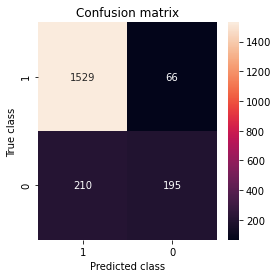

In [ ]:
LABELS = ['1', '0']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(4, 4))
sns.heatmap(conf_matrix, xticklabels = LABELS,
			yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
# fine tuning hyper parameters using
epochs = [30,150, 200, 250]
batches = [5, 10,50,80, 100]
optimizers = ['rmsprop', 'adam', 'sgd']
# Create hyperparameter options
hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)

# Create grid search
grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters,cv = 3, n_jobs=-1)

# Fit grid search
grid_result = grid.fit(X_train, y_train)
print(); print(grid_result.best_params_)

Epoch 1/200
80/80 [==============================] - 0s 744us/step - loss: 0.9468 - acc: 0.6229 - mae: 0.4386
Epoch 2/200
80/80 [==============================] - 0s 763us/step - loss: 0.6732 - acc: 0.8058 - mae: 0.3010
Epoch 3/200
80/80 [==============================] - 0s 783us/step - loss: 0.5798 - acc: 0.8219 - mae: 0.2752
Epoch 4/200
80/80 [==============================] - 0s 745us/step - loss: 0.5377 - acc: 0.8179 - mae: 0.2761
Epoch 5/200
80/80 [==============================] - 0s 795us/step - loss: 0.5124 - acc: 0.8177 - mae: 0.2744
Epoch 6/200
80/80 [==============================] - 0s 783us/step - loss: 0.4735 - acc: 0.8344 - mae: 0.2619
Epoch 7/200
80/80 [==============================] - 0s 770us/step - loss: 0.4510 - acc: 0.8433 - mae: 0.2521
Epoch 8/200
80/80 [==============================] - 0s 757us/step - loss: 0.4358 - acc: 0.8461 - mae: 0.2487
Epoch 9/200
80/80 [==============================] - 0s 778us/step - loss: 0.4191 - acc: 0.8489 - mae: 0.2388
Epoch 10/2

80/80 [==============================] - 0s 694us/step - loss: 0.3505 - acc: 0.8623 - mae: 0.2066
Epoch 75/200
80/80 [==============================] - 0s 745us/step - loss: 0.3453 - acc: 0.8690 - mae: 0.2040
Epoch 76/200
80/80 [==============================] - 0s 707us/step - loss: 0.3501 - acc: 0.8632 - mae: 0.2083
Epoch 77/200
80/80 [==============================] - 0s 707us/step - loss: 0.3444 - acc: 0.8652 - mae: 0.2069
Epoch 78/200
80/80 [==============================] - 0s 705us/step - loss: 0.3452 - acc: 0.8632 - mae: 0.2039
Epoch 79/200
80/80 [==============================] - 0s 707us/step - loss: 0.3455 - acc: 0.8675 - mae: 0.2044
Epoch 80/200
80/80 [==============================] - 0s 719us/step - loss: 0.3519 - acc: 0.8601 - mae: 0.2062
Epoch 81/200
80/80 [==============================] - 0s 694us/step - loss: 0.3499 - acc: 0.8634 - mae: 0.2055
Epoch 82/200
80/80 [==============================] - 0s 694us/step - loss: 0.3491 - acc: 0.8622 - mae: 0.2076
Epoch 83/200
8

80/80 [==============================] - 0s 711us/step - loss: 0.3357 - acc: 0.8707 - mae: 0.1983
Epoch 148/200
80/80 [==============================] - 0s 732us/step - loss: 0.3356 - acc: 0.8711 - mae: 0.2004
Epoch 149/200
80/80 [==============================] - 0s 694us/step - loss: 0.3302 - acc: 0.8725 - mae: 0.1960
Epoch 150/200
80/80 [==============================] - 0s 707us/step - loss: 0.3488 - acc: 0.8607 - mae: 0.2049
Epoch 151/200
80/80 [==============================] - 0s 694us/step - loss: 0.3330 - acc: 0.8691 - mae: 0.1922
Epoch 152/200
80/80 [==============================] - 0s 718us/step - loss: 0.3407 - acc: 0.8660 - mae: 0.2012
Epoch 153/200
80/80 [==============================] - 0s 707us/step - loss: 0.3284 - acc: 0.8712 - mae: 0.1946
Epoch 154/200
80/80 [==============================] - 0s 707us/step - loss: 0.3316 - acc: 0.8711 - mae: 0.1965
Epoch 155/200
80/80 [==============================] - 0s 707us/step - loss: 0.3466 - acc: 0.8645 - mae: 0.2041
Epoch 

In [ ]:
y_pred_grid = grid_result.predict(X_test)
y_pred_grid = (y_pred_grid > 0.5)
make_predictions(X_test,y_test,y_pred_grid)

20/20 [==============================] - 0s 525us/step


Confusion Matrix:
 [[1467  128]
 [ 162  243]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      1595
           1       0.65      0.60      0.63       405

    accuracy                           0.85      2000
   macro avg       0.78      0.76      0.77      2000
weighted avg       0.85      0.85      0.85      2000


Accuracy Score: 
 85.5


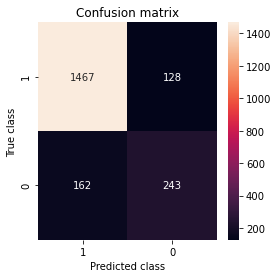

In [ ]:
# printing the confusion matrix
LABELS = ['1', '0']
conf_matrix = confusion_matrix(y_test, y_pred_grid)
plt.figure(figsize =(4, 4))
sns.heatmap(conf_matrix, xticklabels = LABELS,
			yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


In [ ]:
# using custom antirectifier layer
import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
class Antirectifier(layers.Layer):
    def __init__(self, initializer="he_normal", **kwargs):
        super(Antirectifier, self).__init__(**kwargs)
        self.initializer = keras.initializers.get(initializer)

    def build(self, input_shape):
        output_dim = input_shape[-1]
        self.kernel = self.add_weight(
            shape=(output_dim * 2, output_dim),
            initializer=self.initializer,
            name="kernel",
            trainable=True,
        )

    def call(self, inputs):
        inputs -= tf.reduce_mean(inputs, axis=-1, keepdims=True)
        pos = tf.nn.relu(inputs)
        neg = tf.nn.relu(-inputs)
        concatenated = tf.concat([pos, neg], axis=-1)
        mixed = tf.matmul(concatenated, self.kernel)
        return mixed

    def get_config(self):
        # Implement get_config to enable serialization. This is optional.
        base_config = super(Antirectifier, self).get_config()
        config = {"initializer": keras.initializers.serialize(self.initializer)}
        return dict(list(base_config.items()) + list(config.items()))

In [ ]:
def create_network2(optimizer='RMSprop'):
        model = Sequential()
        model.add(Dense(units=36, input_shape=(X_train.shape[1],),
                        kernel_regularizer=l2(0.001),           # weight regularizer
                        kernel_initializer=VarianceScaling(),   # initializer
                        activation='relu'))
        model.add(Dense(units=28,
                        kernel_regularizer=l2(0.01),            # weight regularizer
                        kernel_initializer=VarianceScaling(),   # initializer
                        activation=Antirectifier()))
      #  model.add(Antirectifier())
        model.add(Dense(units=1, activation='sigmoid'))

        # Compile the Model
        model.compile(loss='binary_crossentropy', optimizer = optimizer,
                      metrics=['acc','mae'])

        return model

In [ ]:
# Compile the model
neural_network2 = KerasClassifier(build_fn=create_network2, verbose=1)
# Train the model
neural_network2.fit(X_train, y_train, batch_size=5, epochs=30, validation_split=0.15)

y_pred = neural_network.predict(X_test)
make_predictions(X_test,y_test,y_pred)

Epoch 1/30
1360/1360 [==============================] - 2s 1ms/step - loss: 0.7187 - acc: 0.7952 - mae: 0.2964 - val_loss: 0.4966 - val_acc: 0.8392 - val_mae: 0.2360
Epoch 2/30
1360/1360 [==============================] - 1s 786us/step - loss: 0.4826 - acc: 0.8332 - mae: 0.2402 - val_loss: 0.4327 - val_acc: 0.8550 - val_mae: 0.1991
Epoch 3/30
1360/1360 [==============================] - 1s 787us/step - loss: 0.4091 - acc: 0.8575 - mae: 0.2074 - val_loss: 0.4016 - val_acc: 0.8625 - val_mae: 0.2112
Epoch 4/30
1360/1360 [==============================] - 1s 855us/step - loss: 0.3976 - acc: 0.8559 - mae: 0.2064 - val_loss: 0.3896 - val_acc: 0.8583 - val_mae: 0.1979
Epoch 5/30
1360/1360 [==============================] - 1s 782us/step - loss: 0.3872 - acc: 0.8549 - mae: 0.2045 - val_loss: 0.3914 - val_acc: 0.8625 - val_mae: 0.2091
Epoch 6/30
1360/1360 [==============================] - 1s 783us/step - loss: 0.3883 - acc: 0.8572 - mae: 0.2048 - val_loss: 0.3880 - val_acc: 0.8625 - val_mae: 0

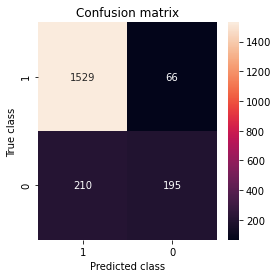

In [ ]:
LABELS = ['1', '0']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(4, 4))
sns.heatmap(conf_matrix, xticklabels = LABELS,
			yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()